In [231]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [232]:
class Perceptron:
    def __init__(self,max_iter, lr_rate):
        self.max_iter = max_iter
        self.lr_rate = lr_rate
    
    def activation(self,x):
        return 0 if x < 0 else 1
    
    def fit(self,x,y):
        self.x = np.hstack((np.ones((x.shape[0],1)),x))
        self.b= np.random.random(self.x.shape[1])
        for _ in range(self.max_iter):
            for i in range(self.x.shape[0]):
                y_pred = self.activation(np.dot(self.x[i],self.b))
                if y_pred != y[i]:
                    self.b = self.b + self.lr_rate*(y[i]-y_pred)*self.x[i]
            return self.b
    
    def predict(self,x):
        x = np.hstack((np.ones((x.shape[0],1)),x))
        return [self.activation(np.dot(k,self.b)) for k in x]
                

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([-1, 1, 1, 1])
or_clf = Perceptron(50,0.01)
or_clf.fit(X, y)
print(or_clf.predict(X))
print(or_clf.b)

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

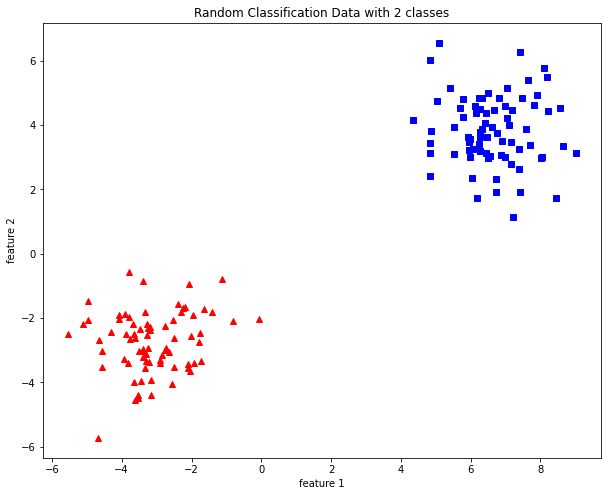

In [237]:
X, y = datasets.make_blobs(n_samples=150,n_features=2, centers=2,cluster_std=1.05)

fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

In [240]:
def plot_decision_boundary(X, b):
    
    # The Line is y=mx+c
    # mx+c = b0*X0 + b1*X1 + b2*X2

    x1 = [min(X[:,0]), max(X[:,0])]
    m = -b[1]/b[2]
    c = -b[0]/b[2]
    x2 = m*np.array(x1) + c
   
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title("Perceptron Algorithm")
    plt.plot(x1, x2, 'y-')

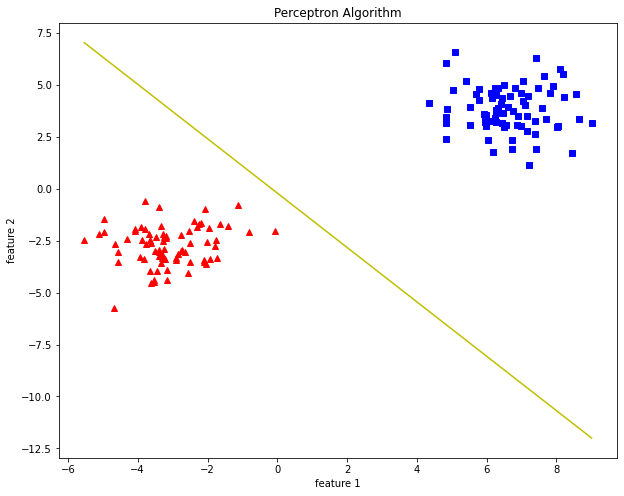

In [241]:
clf = Perceptron(50,0.01)
clf.fit(X, y)
b = clf.b
plot_decision_boundary(X,b)